### Классификация

Вы уже встречались с задачей классификации в работе [«Персонализация новостной ленты Hacker News»](http://127.0.0.1:4000/2017/11/22/06-hackernews/). В общем виде задачу классификации можно представить следующим образом: имеется множество объектов, которые разделены на классы по некоторым признакам. Например, успевающие студенты и отстающие студенты. В обучающей выборке задано конечное множество объектов и их признаков. Например, перечень всех студентов учебного заведения и все оценки по прошедшим и текущим дисциплинам. Для каждого из объектов обучающей выборки известно, к каким классам они относятся. Принадлежность же остальных объектов к классам неизвестна. Требуется построить алгоритм, способный классифицировать произвольный объект из исходного множества, то есть указать наименование (или номер) класса, к которому объект отнесён в результате применения алгоритма классификации.

### *Логистическая регрессия*

Давайте рассмотрим логистическую регрессию на примере набора данных цветов ириса.

Для простоты будем использовать только два признака `Sepal Width` и `Sepal Length`, а также два класса `Setosa` и `Versicolor`:

In [27]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import scipy
%matplotlib inline

In [4]:
data = datasets.load_iris()
X = data.data[:100, :2]
y = data.target[:100]

In [5]:
class LogRegression:
    def __init__(self, lr=0.01, n_iter=100):
        self.lr = lr
        self.n_iter = n_iter
        
    def fit(self, X, y):
        X = np.hstack([np.ones((len(X), 1)), X])
        self.theta = np.zeros(X.shape[1])
        for i in range(self.n_iter):
            z = X @ self.theta
            p =  1 / (1 + np.exp(-z))
            gradient = (X.T @ (p - y)) / len(y)
            self.theta -= self.lr * gradient

        
    def predict(self, X):
        X = np.hstack([np.ones((len(X), 1)), X])
        pred = (1 / (1 + np.exp(-(X @ self.theta))))
        return [1 if i > 0.5 else 0 for i in pred]

    def predict_proba(self, X):
      prob = self.sigmoid(X)
      scipy.special.expit(prob, out=prob)
      if prob.ndim == 1:
          return np.vstack([1 - prob, prob]).T
      else:
          prob /= prob.sum(axis=1).reshape((prob.shape[0], -1))
          return prob

    def sigmoid(self, x):
      return 1.0 / (1 + np.exp(-x))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)
model = LogRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
sum(y_test == y_pred)

29

In [16]:
model.theta

array([-0.02262618,  0.12559568, -0.20109839])

In [19]:
accuracy_score(y_test, y_pred)

0.9666666666666667

In [20]:
def plot_roc_curve(y_pred, y_test):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

y_pred_probs = model.predict_proba(X_test)[:,1]

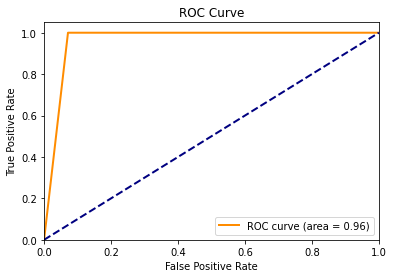

In [21]:
plot_roc_curve(y_pred, y_test)

Проверим на случайных данных:

In [23]:
X, y = make_classification(n_samples=10000, n_features=10, n_classes=2, n_informative=5, random_state=17)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

model = LogRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [24]:
sum(y_test == y_pred) # 2306

2283

In [25]:
accuracy_score(y_test, y_pred)

0.761

In [28]:
confusion_matrix(y_test, y_pred)

array([[ 928,  564],
       [ 153, 1355]])

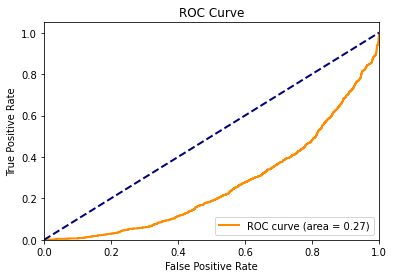

In [29]:
def plot_roc_curve(y_pred, y_test):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

y_pred = model.predict_proba(X_test)[:,1]
plot_roc_curve(y_pred, y_test)